# Steering function -- measurements and function parameterization
Erik Frisk (<erik.frisk@liu.se>)<br>
Department of Electrical Engineering<br>
Linköping University<br>
Sweden

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from misc import BoxOff
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [9.0, 6.0]

## Register and plot data

Actuated different steering outputs, drew a triangle with hypotenuse tangent to wheel and recorded length of cathi.

In [2]:
steer = np.array([-100, -80, -60, -40, -20, 0, 20, 40, 60, 80, 100])
catheths = np.array([[115, -38.5],
                     [115, -31.1],
                     [115, -22.2],
                     [115, -15.0],
                     [115, -8.0],
                     [1, 0],
                     [115, 7.5],
                     [115, 15.5],
                     [120, 28.5],
                     [122.5, 43.0],
                     [100, 44.0]])
angle = np.arctan2(catheths[:, 1], catheths[:, 0])

Plot the data and symmetry illustration

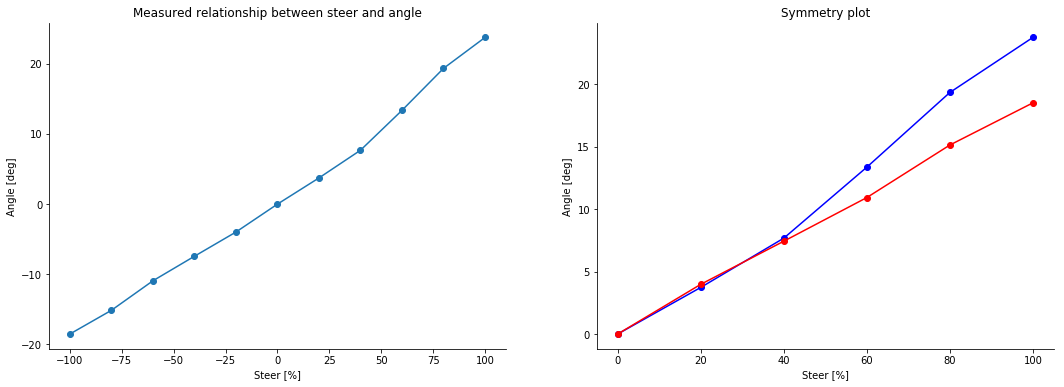

In [13]:
plt.figure(10, figsize=(18,6))
plt.clf()
plt.subplot(1,2,1)
plt.plot(steer, angle*180/np.pi, '-o')
plt.xlabel('Steer [%]')
plt.ylabel('Angle [deg]')
plt.title('Measured relationship between steer and angle')
BoxOff()

plt.subplot(1,2,2)
plt.plot(steer[5:], angle[5:]*180/np.pi, 'b-o')
plt.plot(-steer[0:6], -angle[0:6]*180/np.pi, 'r-o')
plt.xlabel('Steer [%]')
plt.ylabel('Angle [deg]')
plt.title('Symmetry plot')
BoxOff()

## Estimate a parametric function

Function looks fairly linear, try
$$y = kx$$

In [14]:
def Steer2Rad(x, k):
    return k*x

Make a least-squares estimate of $k$

In [15]:
k = 1/steer.dot(steer)*steer.dot(angle)

Plot the resulting curve

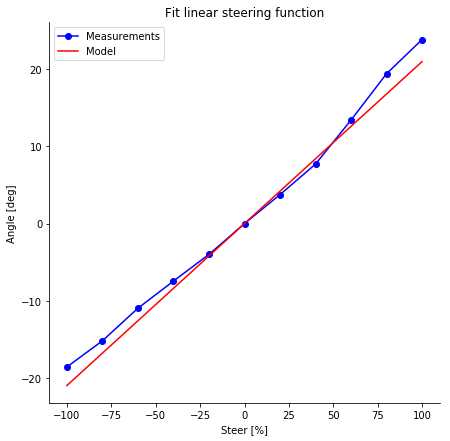

In [20]:
plt.figure(30,figsize=(7,7))
plt.clf()
plt.plot(steer, angle*180/np.pi, 'b-o')
x = np.linspace(-100, 100, 50)
plt.plot(x, Steer2Rad(x, k)*180.0/np.pi, 'r')

plt.xlabel('Steer [%]')
plt.ylabel('Angle [deg]')
plt.title('Fit linear steering function')
plt.legend(['Measurements', 'Model'])
BoxOff()

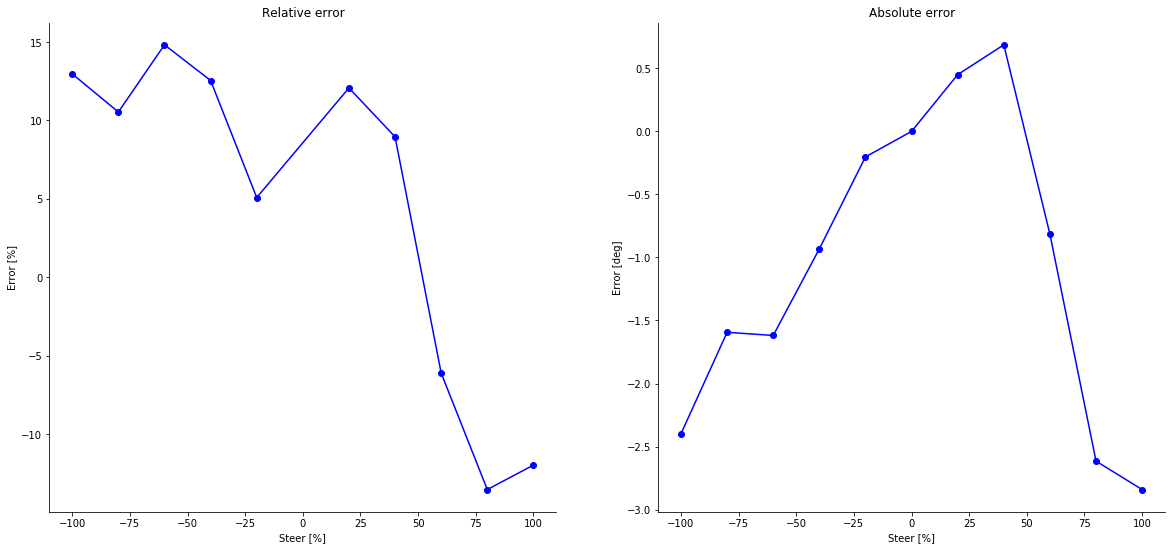

In [22]:
plt.figure(60, figsize=(20,9))
plt.clf()
plt.subplot(1, 2, 1)
idx = np.hstack((np.arange(0, 5), np.arange(6, 11)))
plt.plot(steer[idx], (Steer2Rad(steer[idx], k)-angle[idx])/angle[idx]*100, 'b-o')
plt.xlabel('Steer [%]')
plt.ylabel('Error [%]')
plt.title('Relative error')
BoxOff()

plt.subplot(1, 2, 2)
plt.plot(steer, (Steer2Rad(steer, k)-angle)*180/np.pi, 'b-o')
plt.xlabel('Steer [%]')
plt.ylabel('Error [deg]')
plt.title('Absolute error')
BoxOff()